# Imports

## libraries

In [1]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## data

In [2]:
data_df = pd.read_csv('../data/Combined Data.csv', index_col=0)
data_df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


# Data cleaning

## check for null values

In [6]:
print("Missing values per column:")
print(data_df.isna().sum())
# print(data_df.isnull().sum())

Missing values per column:
statement    362
status         0
dtype: int64


## Look at the labels


Unique labels: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']

Label distribution:
status
Normal                  0.308259
Depression              0.290406
Suicidal                0.200837
Anxiety                 0.073299
Bipolar                 0.054239
Stress                  0.050318
Personality disorder    0.022642
Name: proportion, dtype: float64


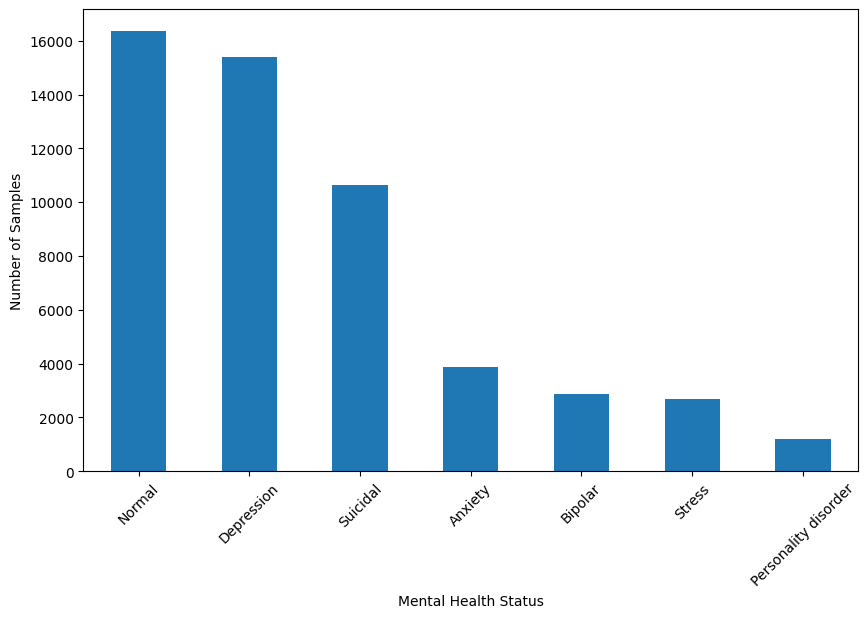

In [8]:
print(f"\nUnique labels: {data_df['status'].unique()}")
print(f"\nLabel distribution:")
print(data_df['status'].value_counts(normalize=True))

# Visualization
plt.figure(figsize=(10, 6))
data_df['status'].value_counts().plot(kind='bar')
plt.xlabel('Mental Health Status')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

## drop null values

In [20]:
data_df = data_df.dropna(axis=0).reset_index(drop=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52681 entries, 0 to 52680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 823.3+ KB


In [26]:
data_df.duplicated().sum()

np.int64(1588)

In [25]:
# data_df.duplicated().sum()
# len(data_df.duplicated())
data_df['statement'].nunique()

51073

In [24]:
# data_df.duplicated(keep=False).sum()
len(data_df.duplicated(keep=False))

52681

In [27]:
df = data_df[data_df.duplicated(keep=False)]

df = df.groupby(list(df)).apply(lambda x: tuple(x.index)).tolist()
# print (len(df))
print(df)

[(51720, 52666), (48401, 49217), (18, 97, 308, 451, 503), (48443, 49259), (9013, 18186, 19776, 20945, 22684, 23525, 23595, 23733), (27631, 29899), (28928, 29526), (47141, 48116), (51703, 52649), (51626, 52572), (47286, 48261), (48474, 49290), (51622, 52568), (48349, 49165), (47213, 48188), (51586, 52532), (48424, 49240), (4702, 4724), (27506, 28080, 28997), (48520, 49336), (36904, 37322), (47214, 48189), (48291, 49107), (49477, 50286), (51723, 52669), (48486, 49302), (49484, 50293), (51630, 52577), (50465, 51361), (36816, 37037), (5894, 6424), (49434, 50243), (51648, 52594), (48281, 49097), (50566, 51462), (48374, 49190), (51574, 52520), (51687, 52633), (47206, 48181), (50473, 51369), (47089, 48064), (49408, 50217), (2773, 4072, 6571), (50529, 51425), (47128, 48103), (47203, 48178), (49523, 50332), (48540, 49356), (48510, 49326), (51625, 52571), (48292, 49108), (50491, 51387), (48527, 49343), (51583, 52529), (51594, 52540), (50468, 51364), (48380, 49196), (50634, 51530), (49375, 50184)

/tmp/ipykernel_64045/1686977393.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(list(df)).apply(lambda x: tuple(x.index)).tolist()


## check for duplicates

In [ ]:
subset_df = data_df.loc[31098:33600]

In [5]:
data_df.duplicated().sum()

np.int64(1588)

## remove duplicaes

In [ ]:
data_df = data_df.drop_duplicates().reset_index(drop=True)
data_df.info()

# EDA

In [ ]:
#histogram of targets
fig,ax = plt.subplots(figsize = (10,8))
sns.histplot(data=data_df,x='status', ax=ax,stat='percent');